Write a program to implement Linear regression using Scikit learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files

In [2]:
data = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


Slope of Linear Regression 0.9492874324043107


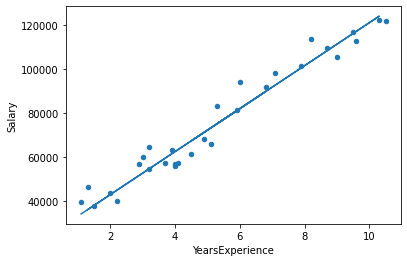

In [4]:
#Reading the file and storing them using pandas
Data=pd.read_csv("/content/Salary_Data.csv")
#Scatter plot for intial data
Data.plot(x='YearsExperience',y='Salary',kind="scatter")
#Storing column values in to X and y as np.array 
X=np.array(Data['YearsExperience']).reshape(-1,1)
y=np.array(Data['Salary']).reshape(-1,1)
#Getting the train and test data set from the train_test_split using sklearn
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
#Fitting the train data set
LR=LinearRegression()
LR.fit(x_train,y_train)
print("Slope of Linear Regression",LR.score(x_test,y_test))
mp.plot(x_test,LR.predict(x_test))

Write a python program to implement Logistic Regression for binary classification 
from scratch using the following dataset. Link: 
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from google.colab import files

In [6]:
data = files.upload()

Saving heart.csv to heart.csv


In [8]:
Data=pd.read_csv("/content/heart.csv")
#Hypothesis 
def hypothesis(X, theta):
    hypo = X@theta
    sigmoid = 1 / (1 + np.exp(-hypo))
    return sigmoid
#Cost Estimation
def cost(X, Y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    y_hat = np.transpose(Y)
    cost_val = -(1/m) * (y_hat@np.log(h) + (1-y_hat)@np.log(1-h))
    return cost_val
#Gradient method
def gradient(X,Y,theta,alpha,epoch):
    X_t = np.transpose(X)
    m = X.shape[0]
    cost_history = np.zeros(epoch)
    for i in range(epoch):
        h = hypothesis(X, theta)
        theta = theta - (alpha/m) * (X_t@(h - Y))
        cost_history[i] = cost(X,Y,theta)
        print(f"Cost after {i} epochs: {cost_history[i]}")
    return theta, cost_history

Cost after 0 epochs: 0.6915240120980172
Cost after 1 epochs: 0.6899115991317358
Cost after 2 epochs: 0.6883098687389293
Cost after 3 epochs: 0.6867187482527114
Cost after 4 epochs: 0.6851381652672095
Cost after 5 epochs: 0.6835680476431216
Cost after 6 epochs: 0.6820083235131118
Cost after 7 epochs: 0.6804589212870372
Cost after 8 epochs: 0.6789197696570151
Cost after 9 epochs: 0.6773907976023265
Cost after 10 epochs: 0.6758719343941624
Cost after 11 epochs: 0.674363109600212
Cost after 12 epochs: 0.6728642530890926
Cost after 13 epochs: 0.6713752950346292
Cost after 14 epochs: 0.6698961659199788
Cost after 15 epochs: 0.6684267965416053
Cost after 16 epochs: 0.666967118013108
Cost after 17 epochs: 0.6655170617688996
Cost after 18 epochs: 0.6640765595677439
Cost after 19 epochs: 0.662645543496148
Cost after 20 epochs: 0.6612239459716165
Cost after 21 epochs: 0.659811699745765
Cost after 22 epochs: 0.6584087379073003
Cost after 23 epochs: 0.6570149938848626
Cost after 24 epochs: 0.655630

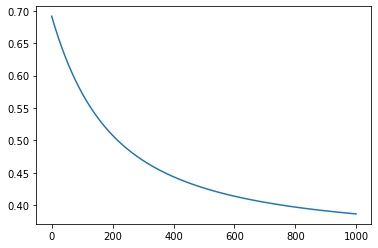

In [9]:
#Train and Test data
X_train=Data.sample(frac=0.8,random_state=2)
X_test=Data.drop(X_train.index)
y_train=X_train.pop("target")
y_test=X_test.pop("target")
#Finding Normals for train and test datas
X_train_n=(X_train-X_train.mean())/(X_train.std())
X_test_n=(X_test-X_test.mean())/(X_train.std())
#Gradient method 
theta = np.zeros(X_train_n.shape[1])
theta,cost=gradient(X_train_n,y_train,theta,0.005,1000)
mp.plot(cost)
#Prediction from test data
prediction=hypothesis(X_test_n,theta)
prediction=(prediction >= 0.5).astype(int)
Accuracy=(prediction==y_test).mean()
print("Accuracy is",Accuracy)